In [113]:
from numpy.random import default_rng         #  numpy randon number generator routines
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [114]:
#-------------------- The simulator, Create BM paths using EM  --------------------
def path_sim( X0, n, dt, T, XT, rng):
    """Simulate and return n independent paths for BM with Z_n being standard normal random variables
       process dX_t = dW_t
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    XT:  (type = float) we want P(X_T<XT)
    rng: an instance of a random number generator: np.random.Generator
    return: (X,T,P) (type = tuple, (np array, np array),float)
            X = simuated paths, X[i,k] = step k of path i
            T = times T[k] = time of step k
            P = P(X_T<XT)
      Note: X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    Count=0
    for i in range(n):
        X[i,0] = X0
        for k in range(nT): 
            
            X[i,k+1] = X[i,k] + rng.standard_normal(1)*np.sqrt(dt) #let Z_n be standard normal
        
        if(X[i,nT]<=XT):
            Count+=1
        
    P=(Count/n)
    return (X,T,P)  

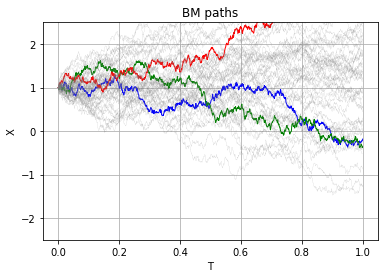

In [115]:
#------------------ The path visualization program ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

X0  = 1.     # starting point for simulated paths
XT  =1      # desired ending point
dt  = .001     # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "OU_densities.pdf"  # filename for a PDF plots

#   Make a picture with a few paths

n_bold = 3                 # number of bold paths
n_soft = 50                # number of softer paths
T_f    = 1.                # simulate to this "fial" time

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#   generate and plot the bold paths

X,T,P = path_sim( X0, n_bold, dt, T_f, XT, rng)

bold_colors = ['blue', 'green', 'red']
for i in range(n_bold):
   ax.plot( T, X[i,:], linewidth = 1, color = bold_colors[i])
   
#   generate and plot the soft paths

X,T,P = path_sim( X0, n_soft, dt, T_f, XT, rng)
for i in range(n_soft):
   ax.plot( T, X[i,:], linewidth = .1, color = 'gray')

plt.ylim( -2.5, 2.5)
plt.xlabel("T")
plt.ylabel("X")
title_string = r"BM paths"
title_string = title_string
plt.title(title_string)
plt.grid()
plt.savefig(PathPlotFile)                                    # save in the same directory
plt.show()

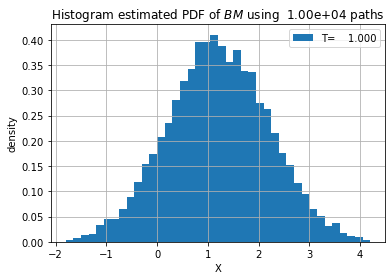

0.4229


In [116]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 10000
n_bins = 40
X_hist = []
dt2=0.01
X0=1.2
T2=1

X,T,P = path_sim( X0, n_hist, dt2, T2, XT, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (X0-3, X0+3), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()
print(P)

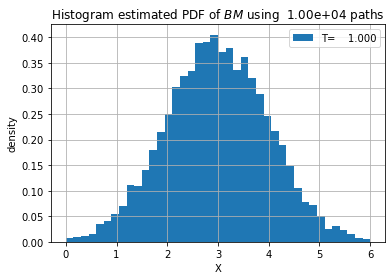

0.0235


In [117]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 10000
n_bins = 40
X_hist = []
dt2=0.01
X0=3
T2=1

X,T,P = path_sim( X0, n_hist, dt2, T2, XT, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (X0-3, X0+3), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()
print(P)

In [118]:
#-------------------- The simulator, Create BM paths using EM  --------------------
def path_sim( X0, n, dt, T, r, XT, rng):
    """Simulate and return n independent paths for BM with Z_n being standard normal random variables
       process dX_t = -rdt + dW_t
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    r:   (type = float) drift rate
    XT:  (type = float) we want P(X_T<XT)
    rng: an instance of a random number generator: np.random.Generator
    return: (X,T,P) (type = tuple, (np array, np array),float)
            X = simuated paths, X[i,k] = step k of path i
            T = times T[k] = time of step k
            P = P(X_T<XT)
      Note: X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    Count=float(0)
    for i in range(n):
        X[i,0] = X0
        for k in range(nT): 
            
            X[i,k+1] = X[i,k] - r*dt + rng.standard_normal(1)*np.sqrt(dt) #let Z_n be standard normal
        
        if(X[i,nT]<=XT):
            Count+=np.exp(r*r/2+r*(X[i,nT]-X0))
    
    P=(Count/n)
    return (X,T,P)  

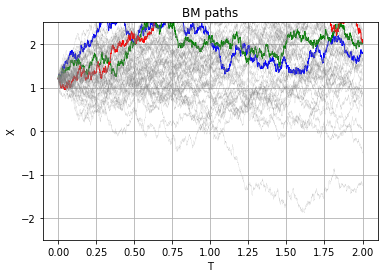

0.31334826547677486


In [121]:
#------------------ The path visualization program ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

r   = -0.5     # drift rate
X0  = 1.2     # starting point for simulated paths
dt  = .001     # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "OU_densities.pdf"  # filename for a PDF plots

#   Make a picture with a few paths

n_bold = 3                 # number of bold paths
n_soft = 50                # number of softer paths
T_f    = 2.                # simulate to this "fial" time

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#   generate and plot the bold paths

X,T,P = path_sim( X0, n_bold, dt, T_f, r, XT, rng)

bold_colors = ['blue', 'green', 'red']
for i in range(n_bold):
   ax.plot( T, X[i,:], linewidth = 1, color = bold_colors[i])
   
#   generate and plot the soft paths

X,T,P = path_sim( X0, n_soft, dt, T_f, r, XT, rng)
for i in range(n_soft):
   ax.plot( T, X[i,:], linewidth = .1, color = 'gray')

plt.ylim( -2.5, 2.5)
plt.xlabel("T")
plt.ylabel("X")
title_string = r"BM paths"
title_string = title_string
plt.title(title_string)
plt.grid()
plt.savefig(PathPlotFile)                                    # save in the same directory
plt.show()

print(P)

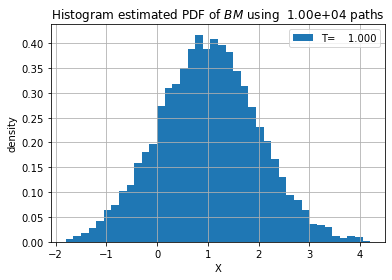

0.4184259441655877


In [122]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 10000
n_bins = 40
X_hist = []
dt2=0.01
X0=1.2
r=0.2
T2=1

X,T,P = path_sim( X0, n_hist, dt2, T2, r, XT, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (X0-3, X0+3), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()
print(P)

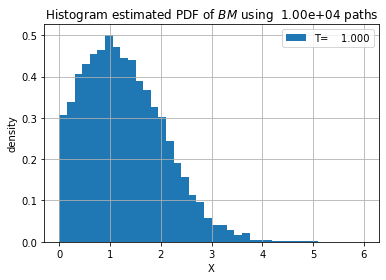

0.02286931632870725


In [123]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 10000
n_bins = 40
X_hist = []
dt2=0.01
X0=3
r=2
T2=1

X,T,P = path_sim( X0, n_hist, dt2, T2, r, XT, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (X0-3, X0+3), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()
print(P)